In [25]:
import numpy as np
from pathlib import Path
import corner
from matplotlib import pyplot as plt

In [26]:
logp = np.load(Path("../log_likelihood.npy"))

In [27]:
logp.shape

(4, 200)

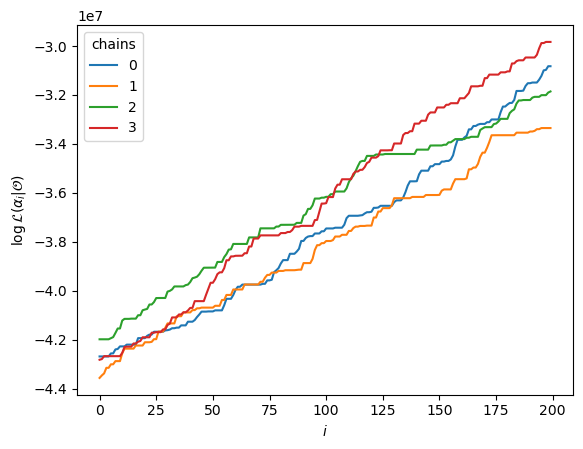

In [31]:
for chain in range(logp.shape[0]):
    plt.plot(logp[chain, ...], label=f"{chain}")
plt.xlabel(r"$i$")
plt.ylabel(r"$\log{\mathcal{L}(\alpha_i | \mathcal{O})}$")
plt.legend(title="chains")

In [29]:
# TODO make plot like the one from chex_cal